# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Hadi Nur Fakhri
- **Email:** mhnfakhri0312@gmail.com
- **ID Dicoding:** Muhammad Hadi Nur Fakhri

## Menentukan Pertanyaan Bisnis

- Apa saja produk yang paling sering mendapatkan ulasan positif dan negatif ?
- Apakah produk tertentu lebih populer atau sering dibeli di wilayah tertentu ?
- Berapa presentase pengiriman barang berhasil ?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install gdown

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data Wrangling

### Gathering Data

In [3]:
!gdown "1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK" -O "E-commerce-public-dataset.zip"
!unzip "E-commerce-public-dataset.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=6482cfdd-bb78-4b00-b894-1af65406a07c
To: /content/E-commerce-public-dataset.zip
100% 44.9M/44.9M [00:01<00:00, 27.9MB/s]
Archive:  E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_data

In [4]:
customers = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
name_translation = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
orders = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
products = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
# List all the datasets
datasets = {
    'customers': customers,
    'geolocation': geolocation,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'name_translation': name_translation,
    'orders': orders,
    'products': products,
    'sellers': sellers
}

####**Insight:**
- There are 9 datasets with each detail
- These datasets are stored in the pandas dataframe for management, and manipulation.


### Assessing Data

#### Checking for all the data type

In [ ]:
# Loop through each dataset and print its info
for name, dataset in datasets.items():
    print(f"Data Type Information for {name}:")
    display(dataset.info())
    print("-" * 30)

Data Type Information for customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

------------------------------
Data Type Information for geolocation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

------------------------------
Data Type Information for order_items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

------------------------------
Data Type Information for order_payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

------------------------------
Data Type Information for order_reviews:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

------------------------------
Data Type Information for name_translation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

------------------------------
Data Type Information for orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

------------------------------
Data Type Information for products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

------------------------------
Data Type Information for sellers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

------------------------------


#### Checking statistic description

In [ ]:
for name, dataset in datasets.items():
    print(f"Data Type Information for {name}:")
    display(dataset.describe())
    print("-" * 30)

Data Type Information for customers:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


------------------------------
Data Type Information for geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


------------------------------
Data Type Information for order_items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


------------------------------
Data Type Information for order_payments:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


------------------------------
Data Type Information for order_reviews:


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


------------------------------
Data Type Information for name_translation:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


------------------------------
Data Type Information for orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


------------------------------
Data Type Information for products:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


------------------------------
Data Type Information for sellers:


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


------------------------------


#### Checking Null Value

In [ ]:
for name, dataset in datasets.items():
    print(f"Data null value {name}:")
    display(dataset.isnull().sum())
    print("-" * 30)

Data null value customers:


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


------------------------------
Data null value geolocation:


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


------------------------------
Data null value order_items:


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


------------------------------
Data null value order_payments:


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


------------------------------
Data null value order_reviews:


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


------------------------------
Data null value name_translation:


,0
product_category_name,0
product_category_name_english,0


------------------------------
Data null value orders:


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


------------------------------
Data null value products:


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


------------------------------
Data null value sellers:


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


------------------------------


##### Kumpulkan data order dengan null value

In [ ]:
null_orders = orders[orders.isnull().any(axis=1)]

# Tampilkan data dengan null value
display(null_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


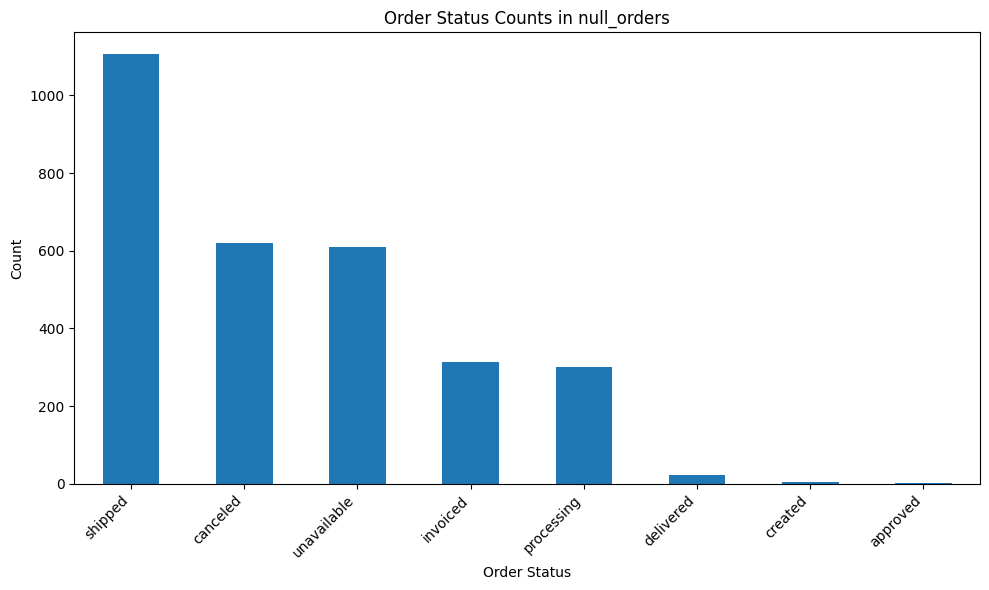

In [ ]:
# Count the occurrences of each order status in the null_orders DataFrame.
order_status_counts = null_orders['order_status'].value_counts()

# Create a bar plot of the order status counts.
plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar')
plt.title('Order Status Counts in null_orders')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### Kumpulkan data product dengan null value

In [ ]:
null_products = products[products.isnull().any(axis=1)]

display(null_products)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
# Check for duplicate product_ids in the null_products DataFrame
duplicate_product_ids = null_products[null_products.duplicated(subset=['product_id'], keep=False)]

# Display the duplicate product_ids
print("Duplicate product_ids in null_products:")
display(duplicate_product_ids)

# Count the occurrences of each duplicate product_id
duplicate_counts = duplicate_product_ids['product_id'].value_counts()

# Display the counts of duplicate product_ids
print("\nCount of each duplicate product_id:")
display(duplicate_counts)

Duplicate product_ids in null_products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm



Count of each duplicate product_id:


,count
product_id,


#### Checking duplicate data

In [ ]:
for name, dataset in datasets.items():
    print(f"Checking for duplicate data in {name}:")
    duplicate_rows = dataset[dataset.duplicated()]
    if not duplicate_rows.empty:
        print("Duplicate rows found:")
        display(duplicate_rows)
    else:
        print("No duplicate rows found.")
    print("-" * 30)

Checking for duplicate data in customers:
No duplicate rows found.
------------------------------
Checking for duplicate data in geolocation:
Duplicate rows found:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


------------------------------
Checking for duplicate data in order_items:
No duplicate rows found.
------------------------------
Checking for duplicate data in order_payments:
No duplicate rows found.
------------------------------
Checking for duplicate data in order_reviews:
No duplicate rows found.
------------------------------
Checking for duplicate data in name_translation:
No duplicate rows found.
------------------------------
Checking for duplicate data in orders:
No duplicate rows found.
------------------------------
Checking for duplicate data in products:
No duplicate rows found.
------------------------------
Checking for duplicate data in sellers:
No duplicate rows found.
------------------------------


#### **Insight**
- there are some empty values found in the dataset. the following are the empty values and their solutions:
1. order_reviews (review_comment_title, review_comment_message): fill with "no comment available" this because we need to maintain the amount of data and column "review_score" is the most important of this case.
2. orders (order_approved_at, order_delivered_carrier_date order_delivered_customer_date): fill with 0 this because we need to maintain the amount of data so we know the delivery precentage rate.
- There are many duplicate data in geolocation which show the same data. the solution keeps 1 and deletes the other
- The column that describes the time needs to be changed to date type. This ensures accurate time-based analysis, such as filtering, sorting, and calculating date differences.

### Cleaning Data

#### Handling missing value

In [14]:
# Dataset order_review

order_reviews['review_comment_title'].fillna('comment not available', inplace=True)
order_reviews['review_comment_message'].fillna('comment not available', inplace=True)

<ipython-input-14-070298c5573c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_title'].fillna('comment not available', inplace=True)
<ipython-input-14-070298c5573c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [15]:
# Dataset orders

orders['order_approved_at'].fillna(0, inplace=True)
orders['order_delivered_carrier_date'].fillna(0, inplace=True)
orders['order_delivered_customer_date'].fillna(0, inplace=True)
orders['order_estimated_delivery_date'].fillna(0, inplace=True)

<ipython-input-15-e04acd9d1f41>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(0, inplace=True)
<ipython-input-15-e04acd9d1f41>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [16]:
# Dataset product

products['product_category_name'].fillna("Unknown", inplace=True)
products['product_name_lenght'].fillna("Unknown", inplace=True)
products['product_description_lenght'].fillna("Unknown", inplace=True)
products['product_photos_qty'].fillna("Unknown", inplace=True)

columns_to_fill = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Iterasi untuk setiap kolom
for column in columns_to_fill:
    # Cari nilai yang paling sering muncul (modus) untuk kolom tersebut
    mode_value = products[column].mode()[0]

    # Isi nilai kosong dengan modus
    products[column].fillna(mode_value, inplace=True)

<ipython-input-16-a31d3278b2c7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name'].fillna("Unknown", inplace=True)
<ipython-input-16-a31d3278b2c7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [17]:
print("Hasil")
for name, dataset in datasets.items():
    print(f"Data null value {name}:")
    display(dataset.isnull().sum())
    print("-" * 30)

Hasil
Data null value customers:


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


------------------------------
Data null value geolocation:


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


------------------------------
Data null value order_items:


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


------------------------------
Data null value order_payments:


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


------------------------------
Data null value order_reviews:


,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


------------------------------
Data null value name_translation:


,0
product_category_name,0
product_category_name_english,0


------------------------------
Data null value orders:


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


------------------------------
Data null value products:


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


------------------------------
Data null value sellers:


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


------------------------------


#### Handling duplicate data

In [18]:
geolocation.drop_duplicates(inplace=True)

# Display the first few rows of the cleaned 'geolocation' dataset to verify
print(geolocation.head())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


#### Convert object to datetime

In [19]:
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

# Display the updated DataFrame to verify the conversion
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  object        
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB
None


####**Insight**
The entire datasets has been processed and ready for analysis

### Create main data

In [20]:
orders_customers = pd.merge(orders, customers, on="customer_id", how="left")

orders_items_customers = pd.merge(orders_customers, order_items, on="order_id", how="left")

orders_items_products_customers = pd.merge(orders_items_customers, products, on="product_id", how="left")

maindata = pd.merge(orders_items_products_customers, order_reviews, on="order_id", how="left")

maindata.to_csv("maindata.csv", index=False)


In [21]:
maindata

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,comment not available,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,comment not available,comment not available,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,comment not available,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5.0,comment not available,comment not available,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,4950.0,40.0,10.0,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,comment not available,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
114088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,13300.0,32.0,90.0,22.0,371579771219f6db2d830d50805977bb,5.0,comment not available,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
114089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,comment not available,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
114090,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,comment not available,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


## Exploratory Data Analysis (EDA)

### Explore Required Dataset

#### Display preview dataset

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,comment not available,comment not available,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,comment not available,comment not available,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,comment not available,comment not available,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,comment not available,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,comment not available,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Display statistic descriptive

In [ ]:
for name, dataset in datasets.items():
    print(f"Data Type Information for {name}:")
    display(dataset.describe())
    print("-" * 30)

Data Type Information for customers:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


------------------------------
Data Type Information for geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


------------------------------
Data Type Information for order_items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


------------------------------
Data Type Information for order_payments:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


------------------------------
Data Type Information for order_reviews:


,review_score,review_answer_timestamp
count,99224.000000,99224
mean,4.086421,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-07 18:32:28
25%,4.000000,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-20 12:11:21.500000
max,5.000000,2018-10-29 12:27:35
std,1.347579,NaN


------------------------------
Data Type Information for name_translation:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


------------------------------
Data Type Information for orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,0,0,0,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


------------------------------
Data Type Information for products:


,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,2276.346454,30.814179,16.937240,23.195988
std,4281.939332,16.914339,13.637247,12.079055
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


------------------------------
Data Type Information for sellers:


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


------------------------------


####**Insight:**
From the data exploration, it can be seen that the data does not show invalidation and is ready to answer the problem question.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja produk yang paling sering mendapatkan ulasan positif dan negatif ?

In [ ]:
# Merge neccesary datasets

reviews_items = pd.merge(order_reviews, order_items, on="order_id", how="inner")
final_data = pd.merge(reviews_items, products, on="product_id", how="inner")
final_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,comment not available,comment not available,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,comment not available,comment not available,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,comment not available,comment not available,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,comment not available,comment not available,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,comment not available,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,comment not available,comment not available,2018-07-07 00:00:00,2018-07-14 17:18:30,1,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,...,226.77,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0
112368,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,comment not available,comment not available,2017-12-09 00:00:00,2017-12-11 20:06:42,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,...,199.99,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
112369,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,comment not available,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,...,215.97,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
112370,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,comment not available,comment not available,2018-07-01 00:00:00,2018-07-02 12:59:13,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,...,50.95,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0


In [ ]:
# Display all product

unique_product_categories = final_data['product_category_name'].unique()

# Tampilkan nilai unik
print("Display all product:")
print(unique_product_categories)

# Hitung jumlah nilai unik
num_unique_categories = len(unique_product_categories)
print(f"\nProduct Count: {num_unique_categories}")

Display all product:
['esporte_lazer' 'informatica_acessorios' 'ferramentas_jardim'
 'cama_mesa_banho' 'brinquedos' 'casa_conforto' 'eletroportateis'
 'beleza_saude' 'pet_shop' 'cool_stuff' 'eletronicos' 'bebes'
 'malas_acessorios' 'utilidades_domesticas' 'relogios_presentes'
 'automotivo' 'telefonia' 'fashion_bolsas_e_acessorios' 'perfumaria'
 'moveis_decoracao' 'eletrodomesticos_2' 'alimentos_bebidas'
 'instrumentos_musicais' 'papelaria' 'livros_importados'
 'moveis_escritorio' 'livros_interesse_geral'
 'construcao_ferramentas_construcao' 'livros_tecnicos'
 'construcao_ferramentas_seguranca' 'artes' 'eletrodomesticos' 'pcs'
 'artigos_de_natal' 'audio' 'Unknown' 'industria_comercio_e_negocios'
 'moveis_sala' 'consoles_games' 'market_place' 'bebidas'
 'moveis_cozinha_area_de_servico_jantar_e_jardim' 'musica' 'moveis_quarto'
 'la_cuisine' 'sinalizacao_e_seguranca' 'casa_construcao' 'alimentos'
 'portateis_casa_forno_e_cafe' 'climatizacao' 'cine_foto'
 'fashion_calcados' 'agro_industria_

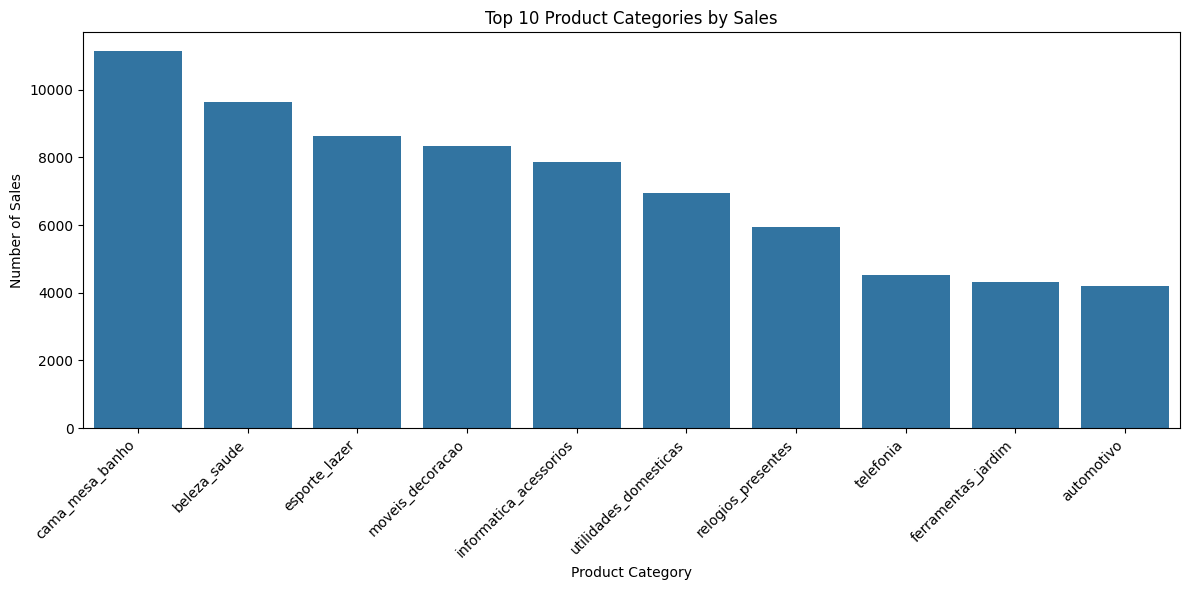

In [ ]:
# Display top 10 product sales

top_10_categories = final_data['product_category_name'].value_counts().head(10)

# Create a bar plot of the top 10 product categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-27-d5557d741245>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_data, x="review_score", palette="viridis")


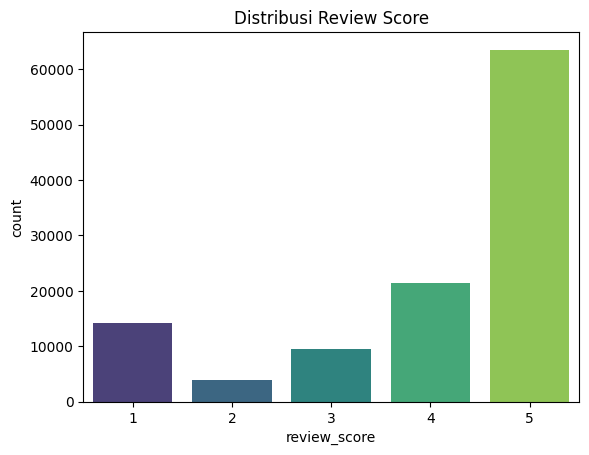

In [ ]:
# Explore data distribution
sns.countplot(data=final_data, x="review_score", palette="viridis")
plt.title("Distribusi Review Score")
plt.show()

<ipython-input-33-15716429583f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=low_reviews[low_reviews["product_category_name"].isin(top_10_low)],


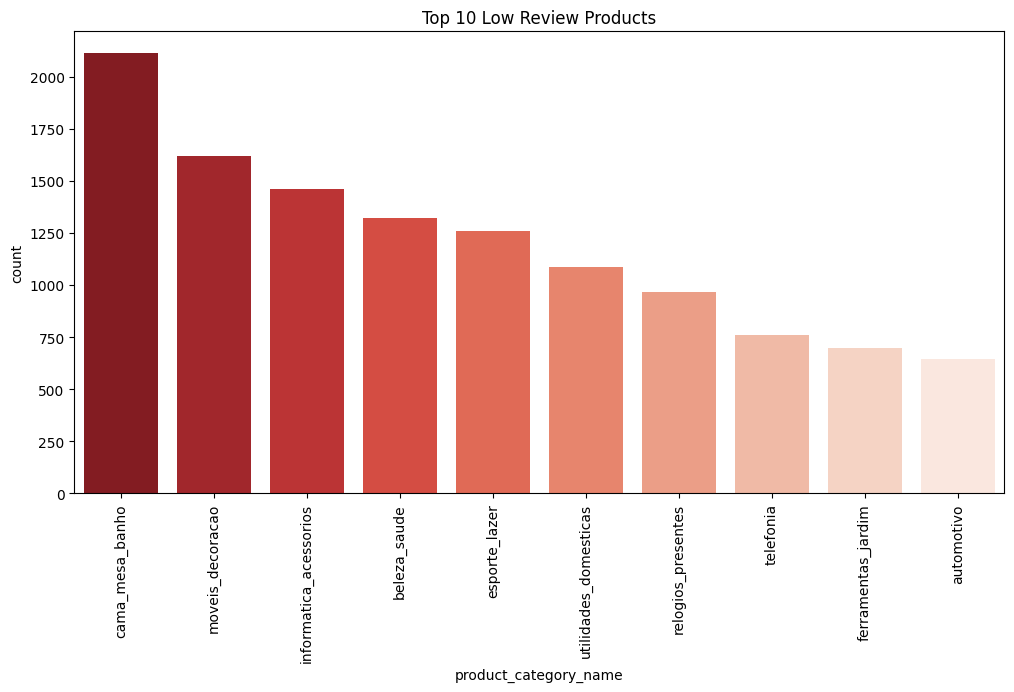

In [ ]:
# Display top 10 low review product

low_reviews = final_data[final_data['review_score'] <= 2]
top_10_low = low_reviews["product_category_name"].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=low_reviews[low_reviews["product_category_name"].isin(top_10_low)],
              x="product_category_name",
              order=top_10_low,
              palette="Reds_r")
plt.xticks(rotation=90)
plt.title("Top 10 Low Review Products")
plt.show()

<ipython-input-44-f73f32954c8b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_reviews[high_reviews["product_category_name"].isin(top_10_high)],


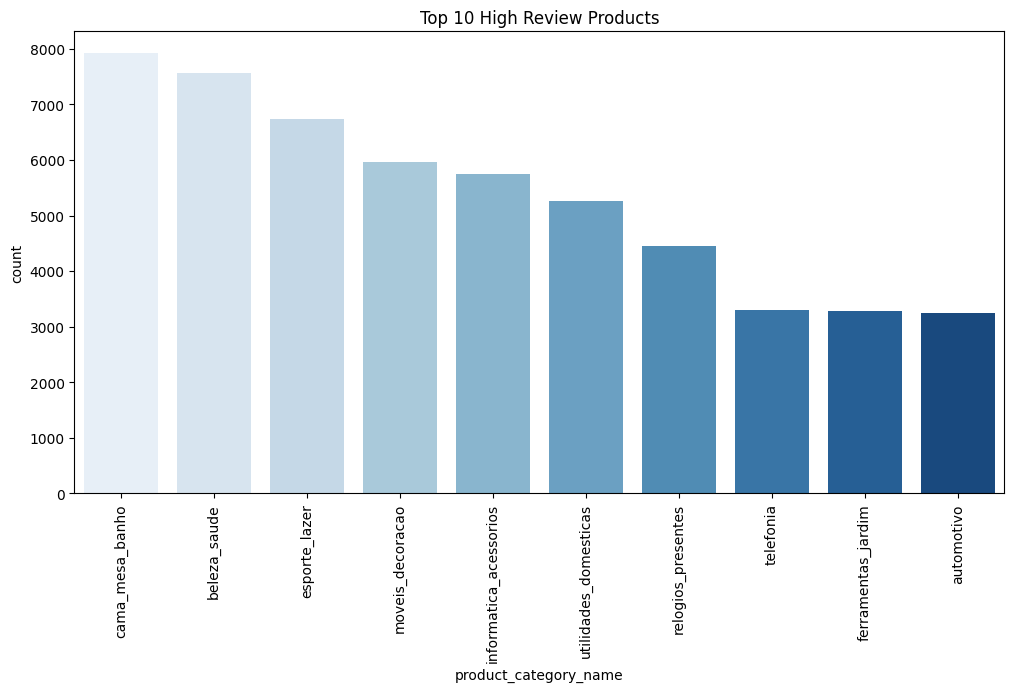

In [ ]:
# Display top 10 high review product

high_reviews = final_data[final_data['review_score'] >= 4]
top_10_high = high_reviews["product_category_name"].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=high_reviews[high_reviews["product_category_name"].isin(top_10_high)],
              x="product_category_name",
              order=top_10_high,
              palette="Blues")
plt.xticks(rotation=90)
plt.title("Top 10 High Review Products")
plt.show()

In [ ]:
# Filter data where product_category_name is 'cama_mesa_banho'
cama_mesa_banho_data = final_data[final_data['product_category_name'] == 'cama_mesa_banho']

# Display the filtered data
cama_mesa_banho_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,comment not available,comment not available,2018-04-13 00:00:00,2018-04-16 00:39:37,1,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,99.9,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
7,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,comment not available,comment not available,2018-04-13 00:00:00,2018-04-16 00:39:37,2,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,99.9,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
8,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,comment not available,comment not available,2018-04-13 00:00:00,2018-04-16 00:39:37,3,4e3550b4ebca5e32ccc3d32b3470e31f,41ab63a91b8b264e8c8780368bf1dd5b,...,119.0,4.40,cama_mesa_banho,30.0,568.0,1.0,900.0,17.0,22.0,17.0
9,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,comment not available,comment not available,2018-04-13 00:00:00,2018-04-16 00:39:37,4,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,99.9,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
10,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,comment not available,comment not available,2017-07-16 00:00:00,2017-07-18 19:30:34,1,3152a0c0d93abeec99e4a6169aecc88b,d2374cbcbb3ca4ab1086534108cc3ab7,...,46.9,11.85,cama_mesa_banho,35.0,133.0,1.0,600.0,40.0,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112301,610ed6c152a1dc6d38f0ace0f25bf51e,946531fd5600174d45682f9a6c493e05,3,comment not available,Cortina que dá um toque de requinte para qualq...,2018-03-09 00:00:00,2018-03-12 12:57:12,1,5570e58fb62fc2a83e5bda3974e35be5,da8622b14eb17ae2831f4ac5b9dab84a,...,99.9,12.40,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0
112321,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,comment not available,comment not available,2017-05-24 00:00:00,2017-05-24 23:15:21,1,e1d6e56531bd9c3dfad4f905f81072c7,da8622b14eb17ae2831f4ac5b9dab84a,...,89.9,17.88,cama_mesa_banho,58.0,192.0,1.0,1400.0,46.0,2.0,36.0
112326,6bf485e9b2d2ce6fdf9a34aebfe88562,20e64aa65fbb0149e274381104f46bbe,5,comment not available,comment not available,2017-12-07 00:00:00,2017-12-07 16:27:14,1,c0a3d13743c894a0bd017a85acb658f3,a3e9a2c700480d9bb01fba070ba80a0e,...,155.0,14.11,cama_mesa_banho,51.0,305.0,1.0,1500.0,49.0,16.0,39.0
112336,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13,1,3beef4346c92eb0b4ad0b7d025dfe15b,b29d3380981c51df13fc6fbe87e1763d,...,46.9,13.91,cama_mesa_banho,58.0,218.0,1.0,717.0,30.0,8.0,28.0


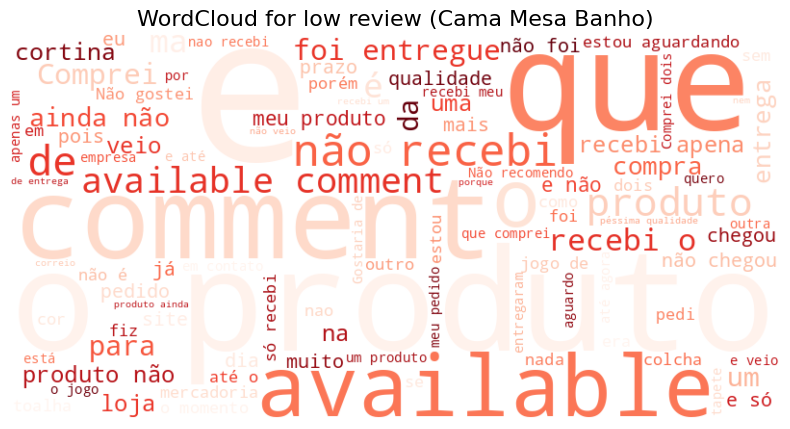

In [ ]:
# Filter data dengan review score < 3
low_review_data = cama_mesa_banho_data[cama_mesa_banho_data['review_score'] < 3]

# Gabungkan semua pesan ulasan menjadi satu teks
text = " ".join(str(comment) for comment in low_review_data['review_comment_message'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds',
                      max_words=100, stopwords=None).generate(text)

# Visualisasi WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for low review (Cama Mesa Banho)", fontsize=16)
plt.show()


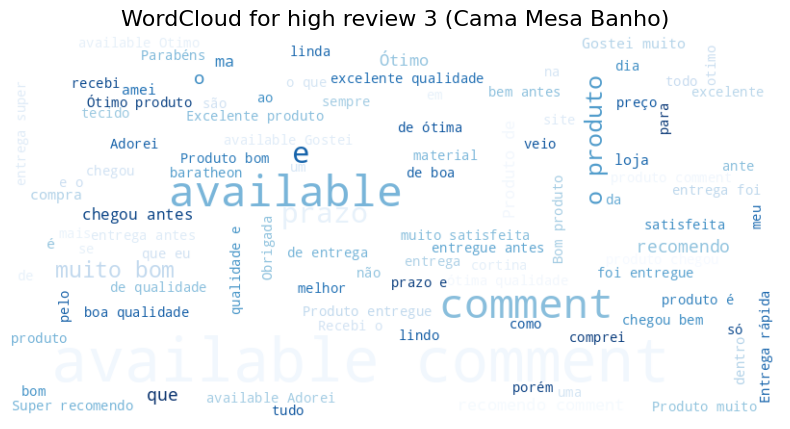

In [ ]:
# Filter data dengan review score > 3
low_review_data = cama_mesa_banho_data[cama_mesa_banho_data['review_score'] > 3]

# Gabungkan semua pesan ulasan menjadi satu teks
text = " ".join(str(comment) for comment in low_review_data['review_comment_message'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues',
                      max_words=100, stopwords=None).generate(text)

# Visualisasi WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for high review 3 (Cama Mesa Banho)", fontsize=16)
plt.show()


#### Insight
The analysis showed that the products that received the most positive and negative reviews were the same items, which may indicate differences in customer perceptions of the quality or experience of using the product.

### Pertanyaan 2: Apakah produk tertentu lebih populer atau sering dibeli di wilayah tertentu ?

In [ ]:
# Merge datasets

orders_customers = pd.merge(orders, customers, on="customer_id", how="inner")
orders_items = pd.merge(orders_customers, order_items, on="order_id", how="inner")
final_data = pd.merge(orders_items, products, on="product_id", how="inner")
final_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [ ]:
# Grouping product and customer state

product_region = final_data.groupby(['product_category_name', 'customer_state']).size().reset_index(name='purchase_count')
product_region

,product_category_name,customer_state,purchase_count
0,Unknown,AC,2
1,Unknown,AL,4
2,Unknown,AM,2
3,Unknown,BA,60
4,Unknown,CE,18
...,...,...,...
1389,utilidades_domesticas,RS,434
1390,utilidades_domesticas,SC,264
1391,utilidades_domesticas,SE,10
1392,utilidades_domesticas,SP,3265


In [ ]:
# Find popular product based on customer state

popular_products = product_region.sort_values(['customer_state', 'purchase_count'], ascending=[True, False])
popular_products

,product_category_name,customer_state,purchase_count
1030,moveis_decoracao,AC,12
651,esporte_lazer,AC,9
843,informatica_acessorios,AC,9
230,beleza_saude,AC,7
1319,telefonia,AC,5
...,...,...,...
935,livros_interesse_geral,TO,1
1004,market_place,TO,1
1029,moveis_cozinha_area_de_servico_jantar_e_jardim,TO,1
1185,pcs,TO,1


<ipython-input-23-60a38a8ae117>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_purchase_count, x='customer_state', y='purchase_count', palette='viridis')


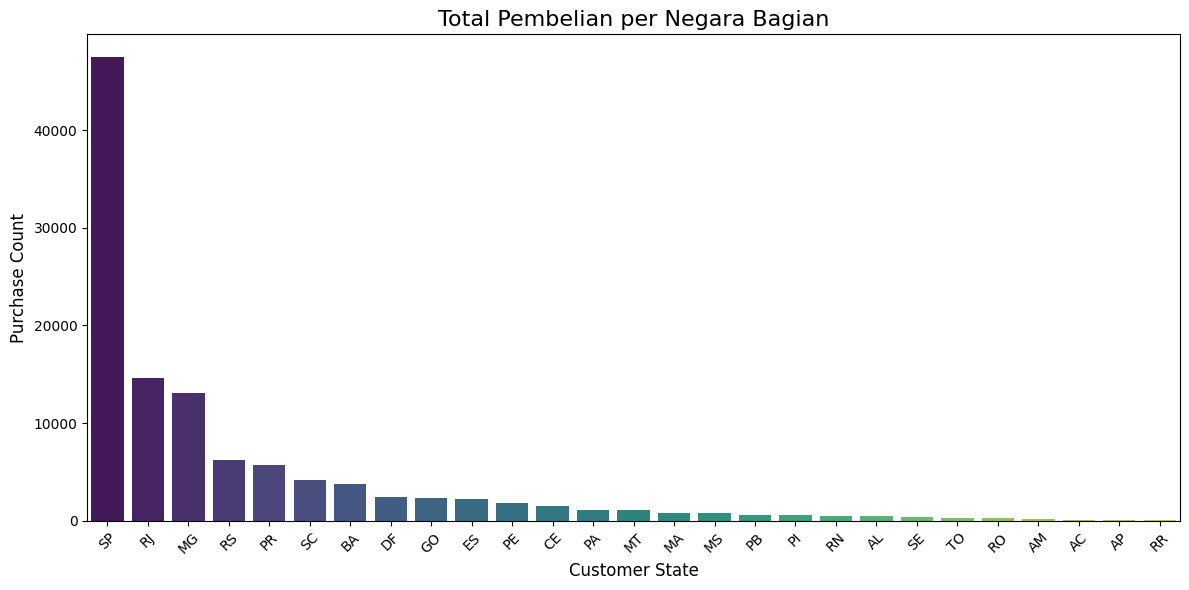

In [ ]:
# Group by customer_state dan hitung total purchase_count
state_purchase_count = final_data.groupby('customer_state').size().reset_index(name='purchase_count')

# Sort berdasarkan purchase_count dari besar ke kecil
state_purchase_count = state_purchase_count.sort_values('purchase_count', ascending=False).reset_index(drop=True)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=state_purchase_count, x='customer_state', y='purchase_count', palette='viridis')
plt.title("Total Pembelian per Negara Bagian", fontsize=16)
plt.xlabel("Customer State", fontsize=12)
plt.ylabel("Purchase Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: tampilkan tabel yang menunjukan total pembelian per negara urutkan abjad dari customer_state

# Merge datasets
orders_customers = pd.merge(orders, customers, on="customer_id", how="inner")
orders_items = pd.merge(orders_customers, order_items, on="order_id", how="inner")
final_data = pd.merge(orders_items, products, on="product_id", how="inner")

# Group by customer_state and calculate total purchase_count
state_purchase_count = final_data.groupby('customer_state').size().reset_index(name='purchase_count')

# Sort by customer_state alphabetically
state_purchase_count = state_purchase_count.sort_values('customer_state').reset_index(drop=True)

# Display the table
state_purchase_count

,customer_state,purchase_count
0,AC,92
1,AL,444
2,AM,165
3,AP,82
4,BA,3799
5,CE,1478
6,DF,2406
7,ES,2256
8,GO,2333
9,MA,824


In [ ]:
# Group by customer_state and product_category_name, then count purchases
product_region = final_data.groupby(['customer_state', 'product_category_name']).size().reset_index(name='purchase_count')

# Sort by customer_state and purchase_count in descending order
sorted_data = product_region.sort_values(['customer_state', 'purchase_count'], ascending=[True, False])

# Get the top 1 product for each state
top_products_per_state = sorted_data.groupby('customer_state').head(1).reset_index(drop=True)

# Display the result
print(top_products_per_state)


   customer_state product_category_name  purchase_count
0              AC      moveis_decoracao              12
1              AL          beleza_saude              63
2              AM          beleza_saude              20
3              AP          beleza_saude              10
4              BA          beleza_saude             350
5              CE          beleza_saude             167
6              DF          beleza_saude             246
7              ES       cama_mesa_banho             225
8              GO       cama_mesa_banho             235
9              MA          beleza_saude              89
10             MG       cama_mesa_banho            1331
11             MS         esporte_lazer              75
12             MT          beleza_saude              90
13             PA          beleza_saude             107
14             PB          beleza_saude              78
15             PE          beleza_saude             240
16             PI          beleza_saude         

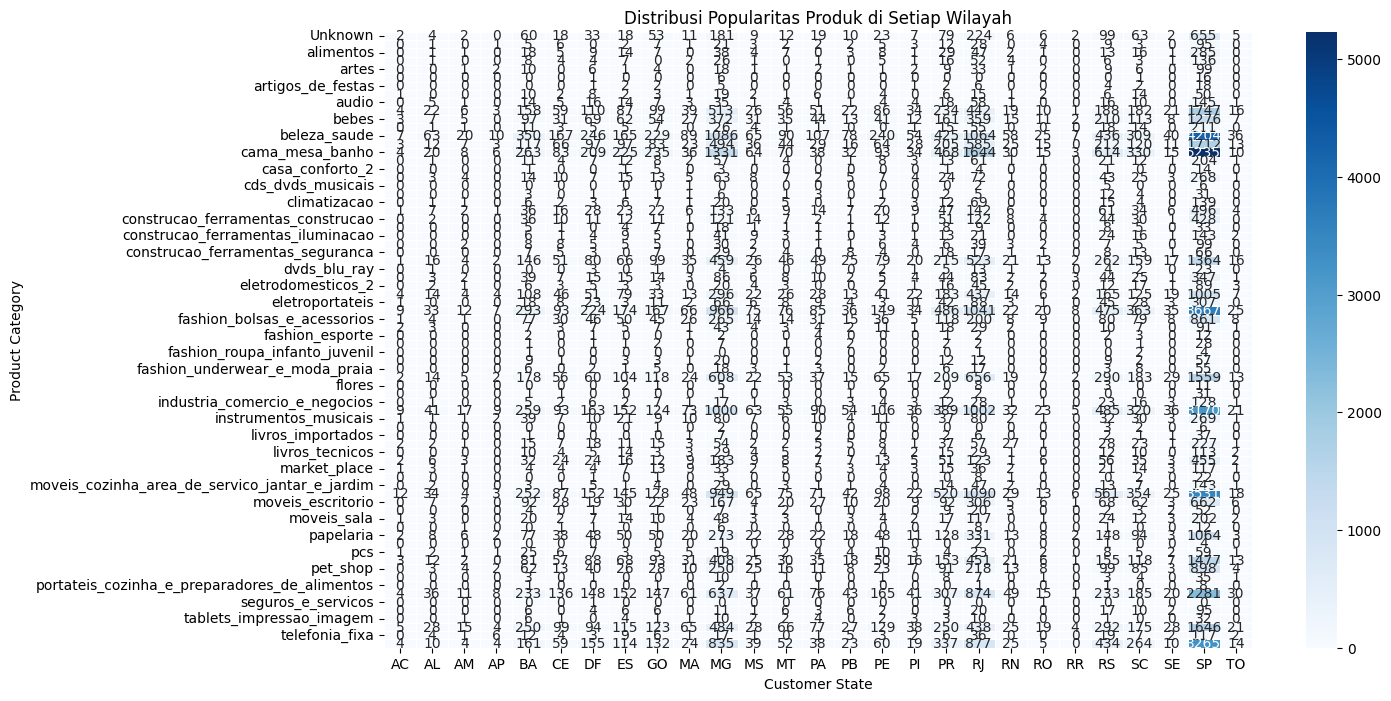

In [ ]:

pivot_data = product_region.pivot(index='product_category_name', columns='customer_state', values='purchase_count').fillna(0)

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Distribusi Popularitas Produk di Setiap Wilayah")
plt.xlabel("Customer State")
plt.ylabel("Product Category")
plt.show()


<ipython-input-26-541cf50af2bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_data, x='purchase_count', y='product_category_name', palette='viridis')


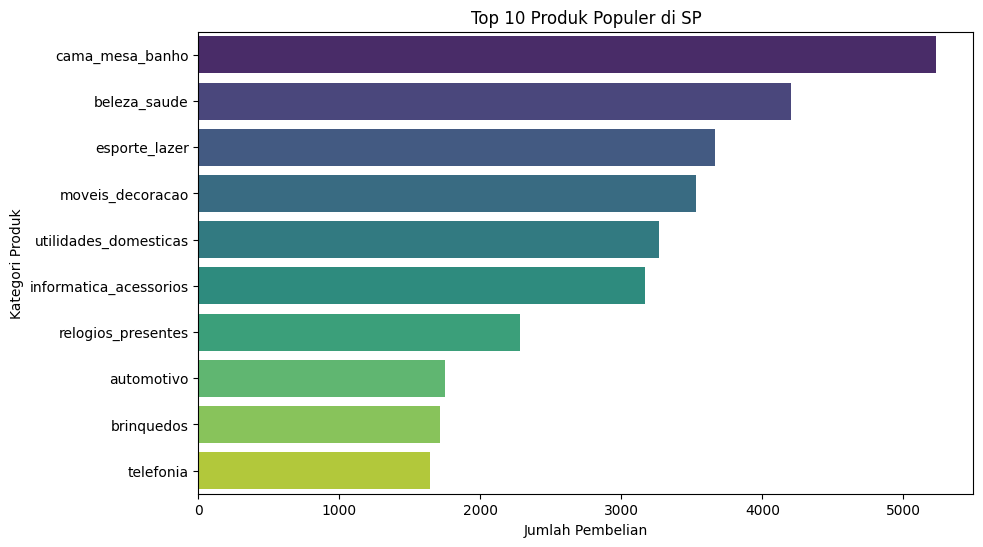

In [ ]:
state_data = product_region[product_region['customer_state'] == 'SP']  # Contoh untuk wilayah SP
state_data = state_data.sort_values('purchase_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=state_data, x='purchase_count', y='product_category_name', palette='viridis')
plt.title("Top 10 Produk Populer di SP")
plt.xlabel("Jumlah Pembelian")
plt.ylabel("Kategori Produk")
plt.show()


#### Insight
Analysis shows that certain products are more popular in certain regions. For example:

- “beleza_saude” (beauty and health) products are the most frequently purchased category in many states such as BA (350 purchases), CE (167 purchases), and PE (240 purchases).
- “cama_mesa_banho” products (room and table supplies) dominated purchases in states such as SP (5235 purchases), RJ (1644 purchases), and MG (1331 purchases).
- “esporte_lazer” (sports and leisure) products are more popular in SC (363 purchases) than other states.

### Pertanyaan 3: Berapa persentase pengiriman barang berhasil?

In [ ]:
print(orders['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [ ]:
# Hitung total pesanan
total_orders = len(orders)

# Hitung pengiriman berhasil (order_status == "delivered" dan tanggal pengiriman tidak kosong)
successful_deliveries = orders[
    (orders['order_status'] == "delivered") &
    (~orders['order_delivered_customer_date'].isna())
]

successful_count = len(successful_deliveries)

# Hitung persentase pengiriman berhasil
success_percentage = (successful_count / total_orders) * 100

print(f"Total Orders: {total_orders}")
print(f"Successful Deliveries: {successful_count}")
print(f"Success Percentage: {success_percentage:.2f}%")

Total Orders: 99441
Successful Deliveries: 96478
Success Percentage: 97.02%


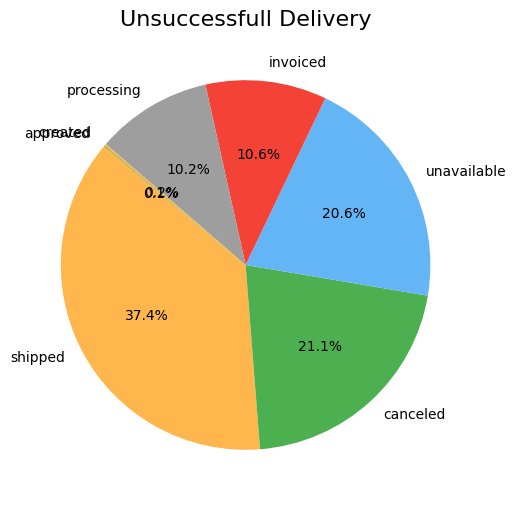

In [ ]:
# Hitung jumlah pesanan berdasarkan status
status_counts = orders['order_status'].value_counts()

# Menentukan status yang tidak termasuk 'delivered'
status_counts = status_counts.drop('delivered', errors='ignore')

# Data untuk pie chart
labels = status_counts.index
sizes = status_counts.values
colors = ['#FFB74D', '#4CAF50', '#64B5F6', '#F44336', '#9E9E9E']  # Warna untuk setiap status

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Unsuccessfull Delivery", fontsize=16)
plt.show()

####Insight
the percentage of “Delivered” shipments is at the top of the rankings which indicates the number of shipments that have been successful. as for the data on items that have not been sent, the majority are due to shipping, canceled, and unavailable items.

## Conclusion

- **Conclusion problem 1:**
shows that the product that gets the most positive and negative reviews is the same item. This item is the highest selling item by far. We suggest to do NLP for analyze in comment section based on customer state
- **Conclusion problem 2:**
Product popularity varies greatly by region. Certain items account for up to 20-30% of sales. in this case, marketing or stocking strategies can be optimized according to each region's purchasing preferences.
- **Conclusion problem 3:**
the majority of recorded items have been successfully delivered